**Import the libraries**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import calendar

import warnings
warnings.filterwarnings("ignore")
%matplotlib inline


**Importing the Data**

In [3]:
df=pd.read_csv("Unemployment in India.csv")

In [5]:
df.head()

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area
0,Andhra Pradesh,31-05-2019,Monthly,3.65,11999139.0,43.24,Rural
1,Andhra Pradesh,30-06-2019,Monthly,3.05,11755881.0,42.05,Rural
2,Andhra Pradesh,31-07-2019,Monthly,3.75,12086707.0,43.50,Rural
3,Andhra Pradesh,31-08-2019,Monthly,3.32,12285693.0,43.97,Rural
4,Andhra Pradesh,30-09-2019,Monthly,5.17,12256762.0,44.68,Rural


**Basic information about the dataset**

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 7 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Region                                    740 non-null    object 
 1    Date                                     740 non-null    object 
 2    Frequency                                740 non-null    object 
 3    Estimated Unemployment Rate (%)          740 non-null    float64
 4    Estimated Employed                       740 non-null    float64
 5    Estimated Labour Participation Rate (%)  740 non-null    float64
 6   Area                                      740 non-null    object 
dtypes: float64(3), object(4)
memory usage: 42.1+ KB


In [9]:
df.isnull().sum()

Region                                      28
 Date                                       28
 Frequency                                  28
 Estimated Unemployment Rate (%)            28
 Estimated Employed                         28
 Estimated Labour Participation Rate (%)    28
Area                                        28
dtype: int64

In [11]:
df.shape

(768, 7)

In [13]:
df.columns

Index(['Region', ' Date', ' Frequency', ' Estimated Unemployment Rate (%)',
       ' Estimated Employed', ' Estimated Labour Participation Rate (%)',
       'Area'],
      dtype='object')

**Formatting the Dataframe**


In [17]:
df.columns = ['States', 'Date', 'Frequency', 'Estimated Unemployment Rate', 'Estimated Employed',
              'Estimated Labour Participation Rate', 'Region']


In [19]:
# Converting 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'], dayfirst=True)

# Converting 'Frequency' and 'Region' columns to categorical data type
df['Frequency'] = df['Frequency'].astype('category')
df['Region'] = df['Region'].astype('category')



In [23]:
# Extracting month from 'Date' and creating a 'Month' column
df['Month'] = df['Date'].dt.month

# Converting 'Month' to integer format
df['Month_int'] = df['Month'].apply(lambda x: int(x) if not pd.isna(x) else x)

# Map integer months to 3-letter month abbreviations
df['Month_name'] = df['Month_int'].apply(lambda x: calendar.month_abbr[int(x)] if not pd.isna(x) else None)

In [25]:
# Dropping the original 'Month' column
df.drop(columns='Month', inplace=True)

In [27]:
df.head()

,States,Date,Frequency,Estimated Unemployment Rate,Estimated Employed,Estimated Labour Participation Rate,Region,Month_int,Month_name
0,Andhra Pradesh,2019-05-31,Monthly,3.65,11999139.0,43.24,Rural,5.0,May
1,Andhra Pradesh,2019-06-30,Monthly,3.05,11755881.0,42.05,Rural,6.0,Jun
2,Andhra Pradesh,2019-07-31,Monthly,3.75,12086707.0,43.50,Rural,7.0,Jul
3,Andhra Pradesh,2019-08-31,Monthly,3.32,12285693.0,43.97,Rural,8.0,Aug
4,Andhra Pradesh,2019-09-30,Monthly,5.17,12256762.0,44.68,Rural,9.0,Sep


**Exploratory Data Analysis**

Basic statistics


In [29]:
df_stats = df[['Estimated Unemployment Rate', 'Estimated Employed', 'Estimated Labour Participation Rate']]
round(df_stats.describe().T, 2)

,count,mean,std,min,25%,50%,75%,max
Estimated Unemployment Rate,740.0,11.79,10.72,0.00,4.66,8.35,15.89,76.74
Estimated Employed,740.0,7204460.03,8087988.43,49420.00,1190404.50,4744178.50,11275489.50,45777509.00
Estimated Labour Participation Rate,740.0,42.63,8.11,13.33,38.06,41.16,45.50,72.57


In [31]:
region_stats = df.groupby(['Region'])[['Estimated Unemployment Rate', 'Estimated Employed', 
                                       'Estimated Labour Participation Rate']].mean().reset_index()
round(region_stats, 2)

,Region,Estimated Unemployment Rate,Estimated Employed,Estimated Labour Participation Rate
0,Rural,10.32,10192852.57,44.46
1,Urban,13.17,4388625.58,40.90


**Heatmap**

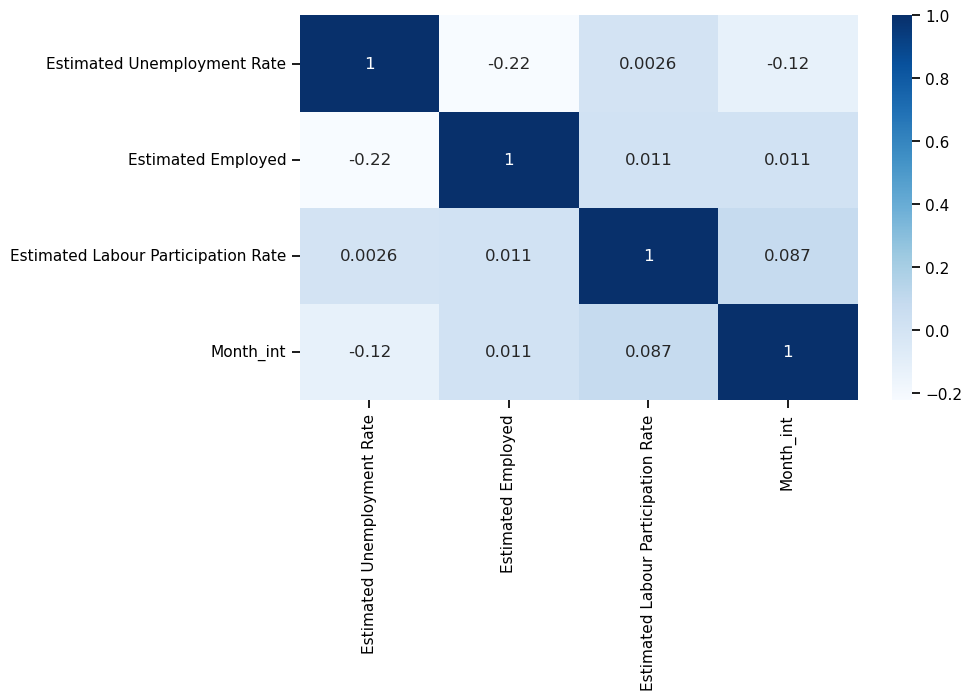

In [41]:
# Correlation Heatmap
heat_maps = df[['Estimated Unemployment Rate', 'Estimated Employed', 'Estimated Labour Participation Rate', 'Month_int']]
heat_maps = heat_maps.corr()
plt.figure(figsize=(9, 5))
sns.heatmap(heat_maps, annot=True, cmap='Blues')
plt.show()

**Unemployment Rate Analysis: Data Visualization**

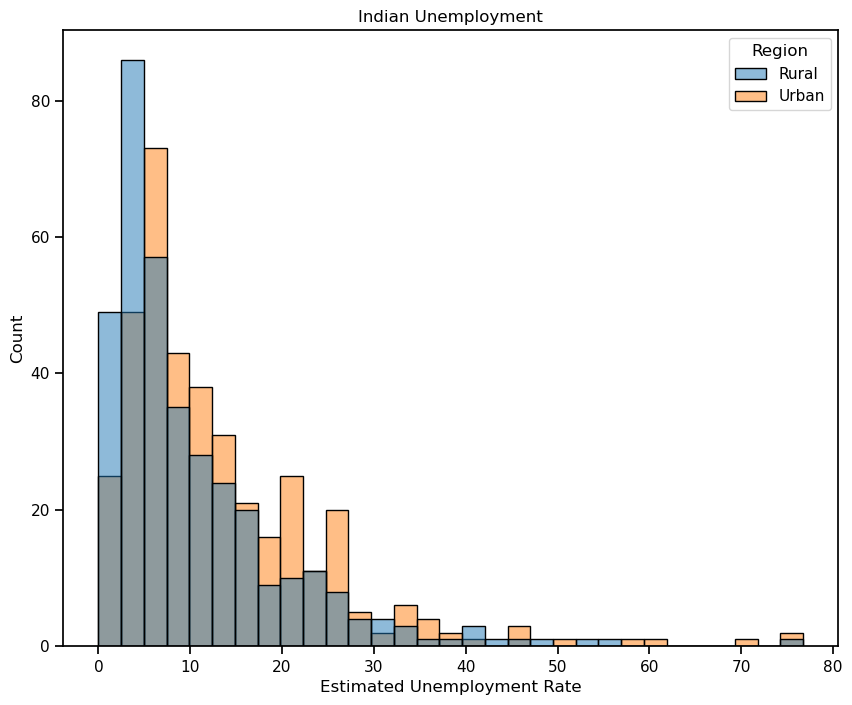

In [43]:
#The unemployment rate according to different regions of India:
plt.figure(figsize=(10, 8))
plt.title("Indian Unemployment")
sns.histplot(x="Estimated Unemployment Rate", hue="Region", data=df)
plt.show()

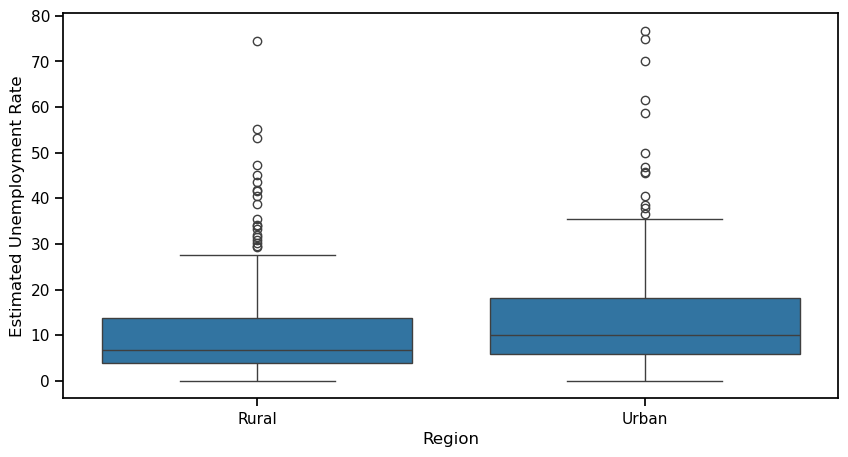

In [69]:
# Box plot of Unemployment Rate by Region
plt.figure(figsize=(10,5))
fig = sns.boxplot(df, x='Region', y='Estimated Unemployment Rate')
plt.show()

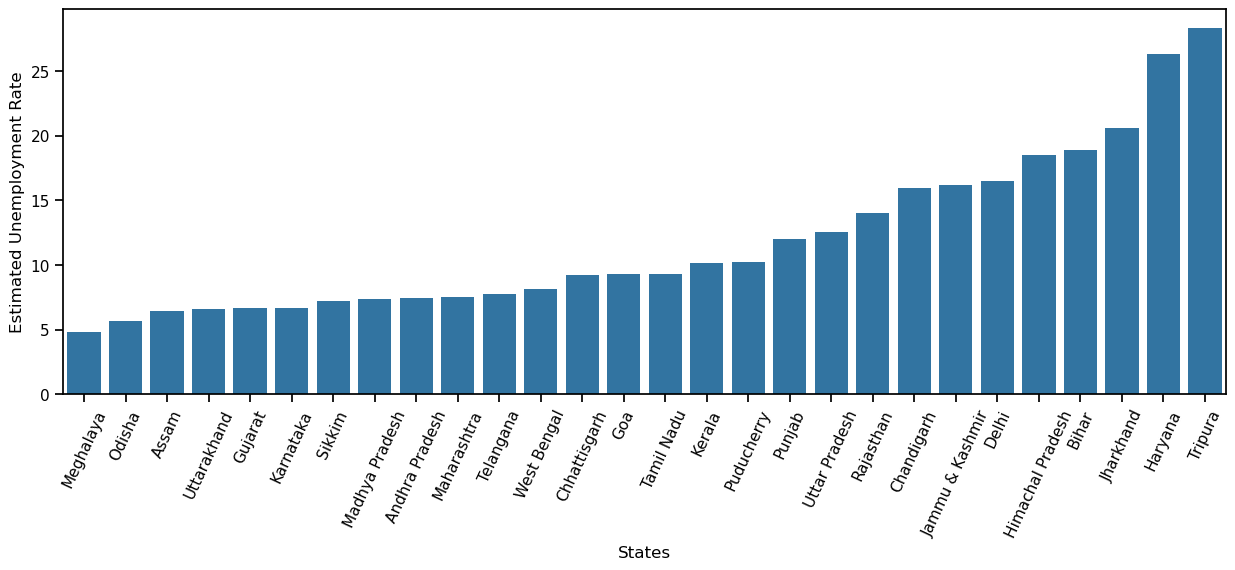

In [97]:
# Bar plot of average Unemployment Rate by State
plt.figure(figsize=(15,5))
plot_ump = df[['Estimated Unemployment Rate', 'States']]
df_unemp = plot_ump.groupby('States').mean().reset_index()
df_unemp = df_unemp.sort_values('Estimated Unemployment Rate')
fig = sns.barplot(df_unemp, x='States', y='Estimated Unemployment Rate')
plt.xticks(rotation=65)
plt.show()

**------>> Haryana and Tripura have long been the most unemployed.**

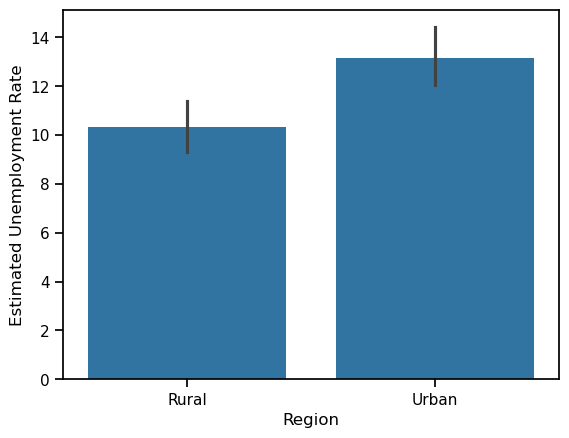

In [115]:
sns.barplot(df, x='Region', y='Estimated Unemployment Rate')
plt.show()

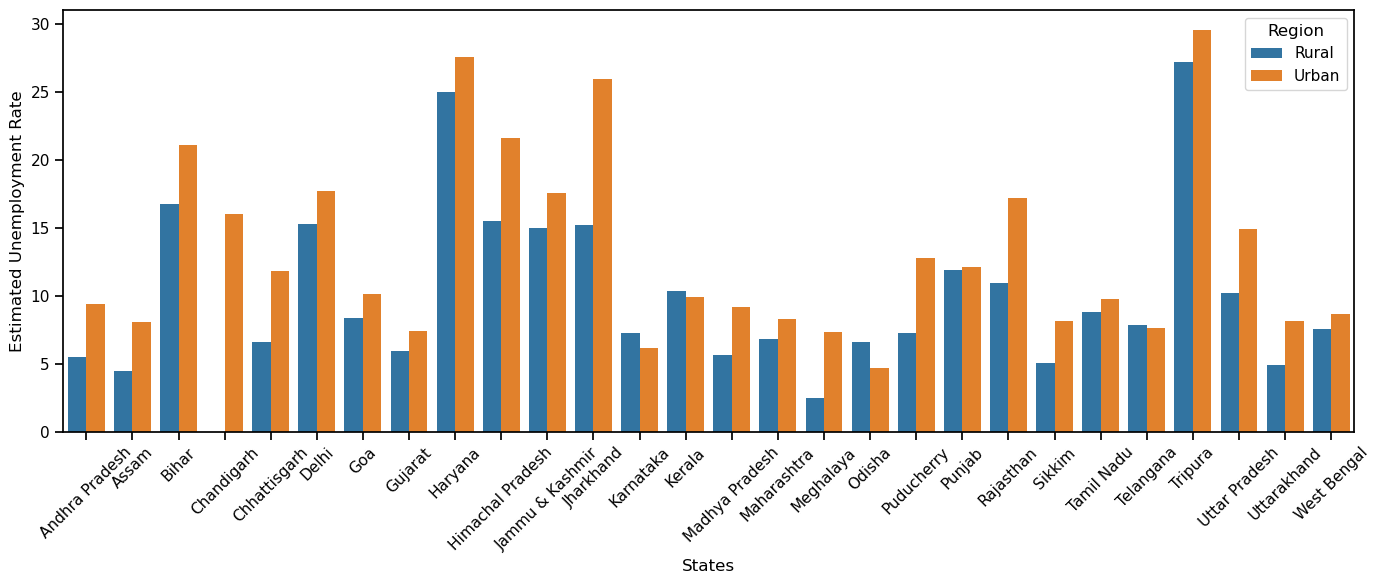

In [121]:

unemplo_df = df[['States', 'Region', 'Estimated Unemployment Rate']]
unemplo = unemplo_df.groupby(['Region', 'States'])['Estimated Unemployment Rate'].mean().reset_index()

plt.figure(figsize=(14, 6))

sns.barplot(data=unemplo, x='States', y='Estimated Unemployment Rate', hue='Region')

plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


In [125]:
#data representation before and after the lockdown
after_lockdown = df[(df['Month_int'] >= 4) & (df['Month_int'] <=6)]
before_lockdown = df[(df['Month_int'] >= 1) & (df['Month_int'] <=4)]


In [129]:
af_lockdown=after_lockdown.groupby('States')['Estimated Unemployment Rate'].mean().reset_index()
lockdown= before_lockdown.groupby('States')['Estimated Unemployment Rate'].mean().reset_index()
lockdown['Unemployment Rate before lockdown'] = af_lockdown['Estimated Unemployment Rate']

lockdown.columns=['States','Unemployment Rate Before Lockdown','Unemployment Rate After Lockdown']
lockdown.head()

,States,Unemployment Rate Before Lockdown,Unemployment Rate After Lockdown
0,Andhra Pradesh,10.756250,11.126000
1,Assam,6.750000,6.563333
2,Bihar,23.690000,27.459000
3,Chandigarh,19.366667,12.656667
4,Chhattisgarh,9.028750,12.720000


In [131]:
# percentage change in unemployment rate

lockdown['rate change in unemployment'] = round(lockdown['Unemployment Rate After Lockdown'] -lockdown['Unemployment Rate Before Lockdown']/lockdown['Unemployment Rate Before Lockdown'],2)
plot_per = lockdown.sort_values('rate change in unemployment')

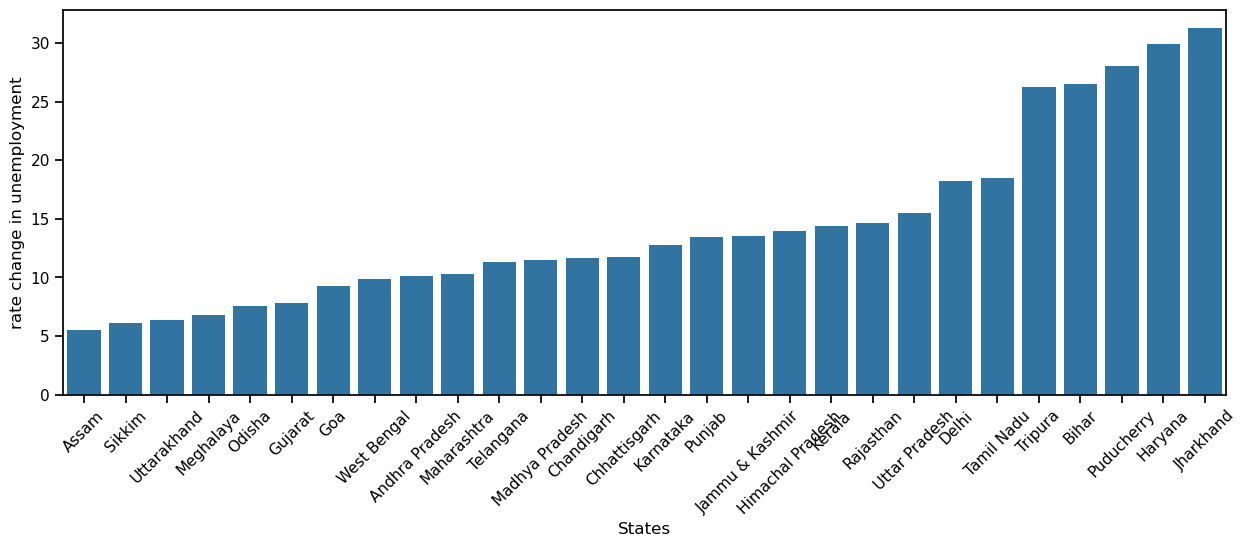

In [141]:
# percentage change in unemployment after lockdown
plt.figure(figsize=(15,5))
fig = sns.barplot(plot_per, x='States',y='rate change in unemployment')
plt.xticks(rotation=45)
plt.show()

**Most impacted States/Union Territories**
* Jharkhand
* Haryana
* Puducherry
* Bihar
* Tripura

In [145]:
# function to sort value based on impact

def sort_impact(x):
    if x <= 10:
        return 'impacted States'
    elif x <= 20:
        return 'hard impacted States'
    elif x <= 30:
        return 'harder impacted States'
    elif x <= 46:
        return 'hardest impacted States'
    return x

In [147]:
plot_per['impact status'] = plot_per['rate change in unemployment'].apply(lambda x:sort_impact(x))

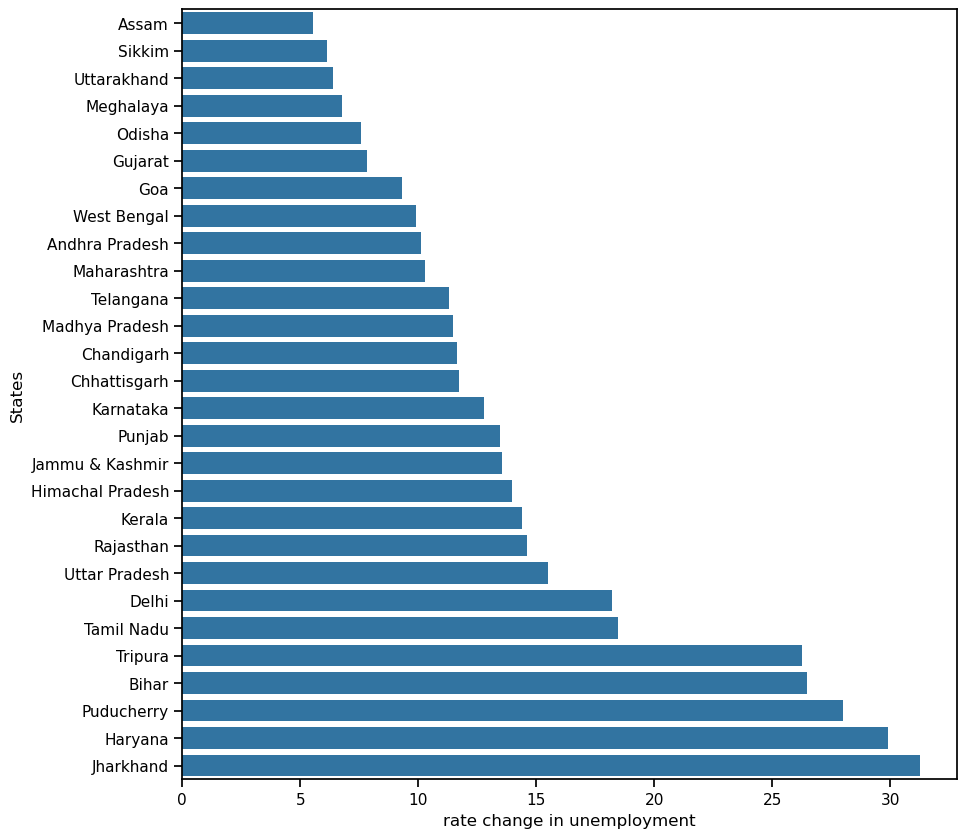

In [157]:
plt.figure(figsize=(10,10))
fig = sns.barplot(plot_per, y='States',x='rate change in unemployment')
plt.show()
